In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [13]:
df=pd.read_csv("/content/titanic_toy.csv")

In [14]:
df.sample(5)

,Age,Fare,Family,Survived
239,33.0,12.275,0,0
555,62.0,26.550,0,0
768,NaN,24.150,1,0
394,24.0,16.700,2,1
126,NaN,7.750,0,0


In [15]:
df.drop(columns=['Family'],inplace=True)

In [17]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
knn=KNNImputer(n_neighbors=5,weights='distance')
x_train_trf=knn.fit_transform(x_train)
x_test_trf=knn.transform(x_test)

In [21]:
x_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.53007554, 221.7792    ],
       [ 48.58823529,  25.925     ]])

In [24]:
x_train_trf=pd.DataFrame(x_train_trf,columns=x_train.columns)
x_test_trf=pd.DataFrame(x_test_trf,columns=x_test.columns)

In [29]:
x_train_trf.isnull().sum()

,0
Age,0
Fare,0


/tmp/ipython-input-3837049370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
/tmp/ipython-input-3837049370.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf['Age'],label='imputed',hist=False)


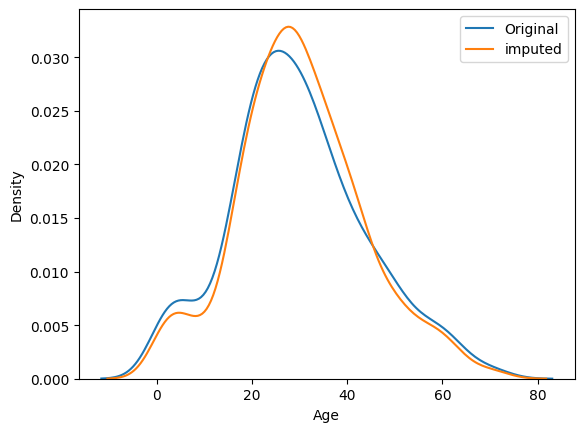

In [28]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train_trf['Age'],label='imputed',hist=False)
plt.legend()
plt.show()

/tmp/ipython-input-2277472793.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'],label='Original',hist=False)
/tmp/ipython-input-2277472793.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf['Fare'],label='imputed',hist=False)


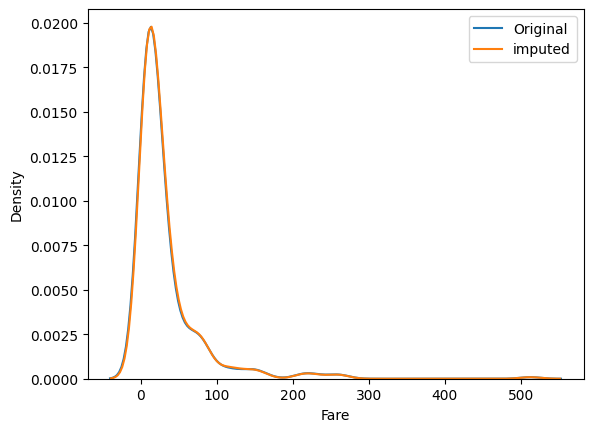

In [30]:
sns.distplot(x_train['Fare'],label='Original',hist=False)
sns.distplot(x_train_trf['Fare'],label='imputed',hist=False)
plt.legend()
plt.show()

In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [35]:
imputer=IterativeImputer(estimator=None,max_iter=100,random_state=2)

In [36]:
x_train_ii=imputer.fit_transform(x_train)
x_test_ii=imputer.transform(x_test)

In [40]:
x_train_ii=pd.DataFrame(x_train_ii,columns=x_train.columns)
x_test_ii=pd.DataFrame(x_test_ii,columns=x_test.columns)

,0
Age,0
Fare,0


/tmp/ipython-input-3158451574.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
/tmp/ipython-input-3158451574.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_ii['Age'],label='imputed',hist=False)


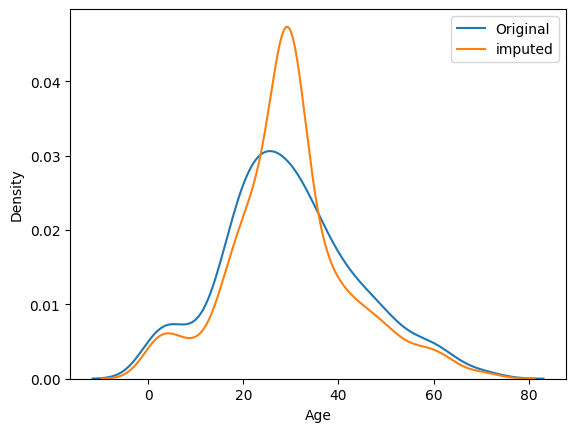

In [44]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train_ii['Age'],label='imputed',hist=False)
plt.legend()
plt.show()